# #features explaination

###Health & Mortality Indicators

*   Adult_mortality: Probability of dying between ages 15–60 per 1000 population.
*   Infant_deaths: Number of infant deaths per 1000 live births.
*   Under_five_deaths: Deaths of children under 5 per 1000 population.
*   Hepatitis_B: Immunization coverage against Hepatitis B.
*   Polio: Polio immunization rate.
*   Diphtheria: DPT vaccination coverage.
*   Measles: Number of reported measles cases per 1000 population.
*   Incidents_HIV: Deaths caused by HIV/AIDS per 1000 population.

###Lifestyle & Physical Health

*   Alcohol_consumption: The average annual alcohol consumption per individual.
*   BMI: Average Body Mass Index.
*   Thinness_ten_nineteen_years: Malnutrition indicator for youth (10–19 years).
*   Thinness_five_nine_years: Malnutrition indicator for children (5–9 years).

###Economic & Socioeconomic Indicators

*   GDP_per_capita: The average income generated per person in a country.
*   Population_mln: The total population size measured in millions.
*   Schooling: Average years of schooling.

###Economic Status

*   Economy_status_Developed: Indicates whether a country is classified as developed.
*   Economy_status_Developing: Indicates whether a country is classified as developing.

###Target Variable

*   Life_expectancy: Average number of years a person is expected to live at birth.


#Import Packages

In [ ]:
import numpy as np
import pandas as pd #To read csv file
import matplotlib.pyplot as plt
import seaborn as sns #To plot Histograms with Distribution curves
from matplotlib import axes #Organize feature sub-groups
#unsure
import scipy.stats as st

In [ ]:
data = pd.read_csv('/content/Life-Expectancy-Data-Updated.csv')

In [ ]:
data

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.320,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.350,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.570,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.680,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.890,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,Niger,Africa,2000,97.0,224.9,291.8240,0.092,72,64,20.8,...,34,0.49,399,11.33,12.8,12.9,1.1,0,1,49.9
2860,Mongolia,Asia,2009,23.9,28.6,235.2330,6.560,97,97,25.3,...,95,0.02,2515,2.67,2.2,2.3,9.1,0,1,66.9
2861,Sri Lanka,Asia,2004,17.7,28.9,134.8950,1.560,62,95,21.9,...,97,0.02,2130,19.39,15.4,15.5,10.3,0,1,74.3
2862,Lithuania,European Union,2002,7.9,9.9,204.0120,11.000,94,95,26.1,...,95,0.05,7424,3.44,3.3,3.3,11.1,1,0,71.8


#Check the dimension of the dataset

In [ ]:
data.shape

(2864, 21)

2864 rows → number of observations (n)

21 columns → number of variables (features + target)



#Get information about the data

In [ ]:
# Display column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

#Classification of Variables in the Dataset

In [ ]:
# Categorical variables
categorical_variables = ["Country", "Region"]

# Numerical variables
numerical_variables = data.columns.drop(categorical_variables)

numerical_variables

Index(['Year', 'Infant_deaths', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Economy_status_Developing',
       'Life_expectancy'],
      dtype='object')

In [ ]:
data["Country"].unique()

array(['Turkiye', 'Spain', 'India', 'Guyana', 'Israel', 'Costa Rica',
       'Russian Federation', 'Hungary', 'Jordan', 'Moldova', 'Brazil',
       'Malta', 'Bahamas, The', 'Ukraine', 'Switzerland', 'Norway',
       'Finland', 'Comoros', 'Japan', 'Gabon', 'Ghana', 'Philippines',
       'Congo, Rep.', 'Madagascar', 'Estonia', 'Belize', 'Kazakhstan',
       'Cameroon', 'Zimbabwe', 'Bhutan', 'South Africa', 'Eritrea',
       'Germany', 'Saudi Arabia', 'Kiribati', 'Seychelles', 'Singapore',
       'Togo', 'Denmark', 'Gambia, The', 'Sweden', 'Austria',
       'Kyrgyz Republic', 'Grenada', 'Brunei Darussalam', 'Greece',
       'Uruguay', 'Croatia', 'Romania', 'Central African Republic',
       'Algeria', 'Yemen, Rep.', 'Armenia',
       'St. Vincent and the Grenadines', 'Kenya', 'Micronesia, Fed. Sts.',
       'Antigua and Barbuda', 'Nepal', 'Lithuania', 'Vanuatu',
       'Afghanistan', 'Kuwait', 'Argentina', 'Panama', 'Oman', 'France',
       'Bosnia and Herzegovina', 'Mauritania', 'Somalia

In [ ]:
data["Country"].unique().size

179

Country is a nominal categorical variable → have 179 unique categories, would create hundreds of dummy variables so we will drop this column instead of making one hot encoding and the country does not affect the life expectancy

# Drop Country column

In [ ]:
# Drop Country column
data.drop(columns=["Country"], inplace=True)

In [ ]:
data["Region"].unique()

array(['Middle East', 'European Union', 'Asia', 'South America',
       'Central America and Caribbean', 'Rest of Europe', 'Africa',
       'Oceania', 'North America'], dtype=object)

In [ ]:
data["Region"].unique().size

9

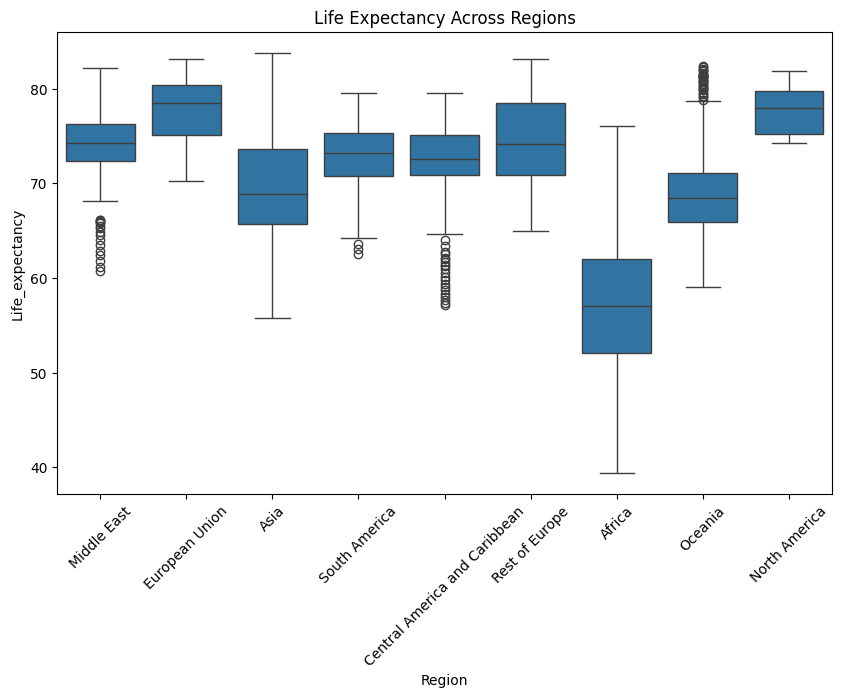

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Life_expectancy', data=data)
plt.xticks(rotation=45)
plt.title('Life Expectancy Across Regions')
plt.show()


 Region has low cardinality (9 categories), unlike Country.
Keeping this variable allows the model to capture regional differences in life expectancy,
 so one-hot encoding is applied.


# One-Hot Encoding to the ['Region] column


In [ ]:
data = pd.get_dummies(
    data,
    columns=['Region'],
    drop_first=True
)


In [ ]:
data


,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Economy_status_Developing,Life_expectancy,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
0,2015,11.1,13.0,105.8240,1.320,97,65,27.8,97,97,...,1,76.5,False,False,False,True,False,False,False,False
1,2015,2.7,3.3,57.9025,10.350,97,94,26.0,97,97,...,0,82.8,False,False,True,False,False,False,False,False
2,2007,51.5,67.9,201.0765,1.570,60,35,21.2,67,64,...,1,65.4,True,False,False,False,False,False,False,False
3,2006,32.8,40.5,222.1965,5.680,93,74,25.3,92,93,...,1,67.0,False,False,False,False,False,False,False,True
4,2012,3.4,4.3,57.9510,2.890,97,89,27.0,94,94,...,0,81.7,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2859,2000,97.0,224.9,291.8240,0.092,72,64,20.8,41,34,...,1,49.9,False,False,False,False,False,False,False,False
2860,2009,23.9,28.6,235.2330,6.560,97,97,25.3,96,95,...,1,66.9,True,False,False,False,False,False,False,False
2861,2004,17.7,28.9,134.8950,1.560,62,95,21.9,97,97,...,1,74.3,True,False,False,False,False,False,False,False
2862,2002,7.9,9.9,204.0120,11.000,94,95,26.1,97,95,...,0,71.8,False,False,True,False,False,False,False,False


# Count missing values for each column


In [ ]:
missing_count = data.isnull().sum()
missing_count

,0
Year,0
Infant_deaths,0
Under_five_deaths,0
Adult_mortality,0
Alcohol_consumption,0
Hepatitis_B,0
Measles,0
BMI,0
Polio,0
Diphtheria,0


#Split Data to Target & Features for Regreesion model

In [ ]:
# Define target variable
y = data['Life_expectancy']

# Define feature matrix (drop target)
X = data.drop(columns=['Life_expectancy'])


# Split the data into training and testing sets
## 80% training, 20% testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


# Outlier Detection using IQR

In [ ]:
outlier_summary = {}  # Dictionary to store the number of outliers for each column

for col in numerical_variables:
    Q1 = data[col].quantile(0.25)  # 25th percentile
    Q3 = data[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1                  # Interquartile range (IQR)

    lower_bound = Q1 - 1.5 * IQR   # Lower bound
    upper_bound = Q3 + 1.5 * IQR   # Upper bound

    # Select rows with value is below lower_bound or above upper_bound
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

    outlier_summary[col] = outliers.shape[0]  # Store the count of outliers

# Convert the dictionary to a DataFrame
pd.DataFrame.from_dict(outlier_summary, orient="index", columns=["Outlier Count"])


,Outlier Count
Year,0
Infant_deaths,29
Under_five_deaths,102
Adult_mortality,112
Alcohol_consumption,2
Hepatitis_B,164
Measles,35
BMI,25
Polio,190
Diphtheria,187


In [ ]:
# Highly skewed variables (difference between values is important)
cols_to_log = [
    'Infant_deaths',
    'Under_five_deaths',
    'GDP_per_capita',
    'Population_mln',
    'Incidents_HIV'
]

# Health-related continuous variables
cols_to_cap = [
    'BMI',
    'Hepatitis_B',
    'Polio',
    'Diphtheria',
    'Thinness_ten_nineteen_years',
    'Thinness_five_nine_years',
    'Alcohol_consumption',
    'Measles'
]

# Variable requiring row removal
col_to_remove_outliers = 'Adult_mortality'


#Apply Log Transformation

In [ ]:
for col in cols_to_log:
    data[col] = np.log1p(data[col])  # log1p avoids issues with zero values


#Remove Outliers (Adult Mortality)

In [ ]:
Q1 = X_train[col_to_remove_outliers].quantile(0.25)
Q3 = X_train[col_to_remove_outliers].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

mask = (X_train[col_to_remove_outliers] >= lower) & (X_train[col_to_remove_outliers] <= upper)

X_train = X_train[mask]
y_train = y_train[mask]


#Apply IQR-Based Capping

In [ ]:
for col in cols_to_cap:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    X_train[col] = X_train[col].clip(lower, upper)
    X_test[col] = X_test[col].clip(lower, upper)


#Check Remaining Outliers

In [ ]:
remaining_outliers = {}

for col in X_train.select_dtypes(include='number').columns:
    Q1 = X_train[col].quantile(0.25)
    Q3 = X_train[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    remaining_outliers[col] = ((X_train[col] < lower) | (X_train[col] > upper)).sum()

pd.DataFrame.from_dict(
    remaining_outliers,
    orient='index',
    columns=['Remaining Outliers']
)


,Remaining Outliers
Year,0
Infant_deaths,31
Under_five_deaths,102
Adult_mortality,34
Alcohol_consumption,0
Hepatitis_B,0
Measles,0
BMI,0
Polio,0
Diphtheria,0


#Descriptive Statistics

In [ ]:
def compute_mean(x):
    return sum(x) / len(x)



In [ ]:
def compute_median(x):
    x_sorted = sorted(x)  # sort values first
    n = len(x_sorted)
    mid = n // 2
    if n % 2 == 0:
        return (x_sorted[mid - 1] + x_sorted[mid]) / 2  # average of two middle values for even data
    else:
        return x_sorted[mid] # middle value for odd data


In [ ]:
def compute_mode(x):
    freq = {}
    for value in x:
        freq[value] = freq.get(value, 0) + 1
    max_freq = max(freq.values())
    modes = [k for k, v in freq.items() if v == max_freq]
    return modes[0]  # return first mode


In [ ]:
def compute_variance(x):
    mean = compute_mean(x)
    return sum((xi - mean)**2 for xi in x) / (len(x) - 1)


In [ ]:
def compute_std(x):
    return compute_variance(x) ** 0.5


In [ ]:
def min_value(x):
    m = x[0]
    for value in x:
        if value < m:
            m = value
    return m

def max_value(x):
    m = x[0]
    for value in x:
        if value > m:
            m = value
    return m


## Measures of Central Tendency


In [ ]:
central_tendency = {}

for col in numerical_variables:
    values = data[col].dropna().tolist()
    central_tendency[col] = {
        "Mean": compute_mean(values),
        "Median": compute_median(values),
        "Mode": compute_mode(values)
    }

central_df = pd.DataFrame(central_tendency).T # Convert results to DataFrame to visuallize
central_df


,Mean,Median,Mode
Year,2007.500000,2007.500000,2015.000000
Infant_deaths,3.015864,3.025291,1.458615
Under_five_deaths,3.247377,3.182212,1.629241
Adult_mortality,192.251775,163.841500,91.945500
Alcohol_consumption,4.820882,4.020000,0.000000
Hepatitis_B,84.292598,89.000000,99.000000
Measles,77.344972,83.000000,64.000000
BMI,25.032926,25.500000,26.000000
Polio,86.499651,93.000000,99.000000
Diphtheria,86.271648,93.000000,99.000000


#Measures of Dispersion

In [ ]:
dispersion = {}

for col in numerical_variables:
    values = data[col].dropna().tolist()
    dispersion[col] = {
        "Variance": compute_variance(values),
        "Standard Deviation": compute_std(values),
        "Min Value": min_value(values),
        "Max Value": max_value(values)
    }
dispersion_df = pd.DataFrame(dispersion).T
dispersion_df


,Variance,Standard Deviation,Min Value,Max Value
Year,21.257422,4.610577,2000.000000,2015.000000
Infant_deaths,0.964663,0.982172,1.029619,4.935193
Under_five_deaths,1.166164,1.079891,1.193922,5.420092
Adult_mortality,13204.372719,114.910281,49.384000,719.360500
Alcohol_consumption,15.855915,3.981949,0.000000,17.870000
Hepatitis_B,255.856376,15.995511,12.000000,99.000000
Measles,348.184131,18.659693,10.000000,99.000000
BMI,4.813219,2.193905,19.800000,32.100000
Polio,227.417394,15.080365,8.000000,99.000000
Diphtheria,241.312140,15.534225,16.000000,99.000000


In [ ]:
data.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
mean,2007.500000,3.015864,3.247377,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.379169,8.399905,2.267503,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,4.610577,0.982172,1.079891,114.910281,3.981949,15.995511,18.659693,2.193905,15.080365,15.534225,0.563758,1.443619,1.454187,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,2000.000000,1.029619,1.193922,49.384000,0.000000,12.000000,10.000000,19.800000,8.000000,16.000000,0.009950,5.003946,0.076961,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,2003.750000,2.208274,2.367896,106.910250,1.200000,78.000000,64.000000,23.200000,81.000000,81.000000,0.076961,7.256121,1.130594,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,2007.500000,3.025291,3.182212,163.841500,4.020000,89.000000,83.000000,25.500000,93.000000,93.000000,0.139762,8.347116,2.180417,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,2011.250000,3.878465,4.204693,246.791375,7.777500,96.000000,93.000000,26.400000,97.000000,97.000000,0.378436,9.438113,3.206297,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000
max,2015.000000,4.935193,5.420092,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,3.121483,11.629988,7.230462,27.700000,28.600000,14.100000,1.000000,1.000000,83.800000


#Feature Standardization (Z-score)

In [ ]:
# Calculate statistics from training data only
train_mean = X_train.mean()
train_std = X_train.std()

# Standardize
X_train = (X_train - train_mean) / train_std
X_test  = (X_test  - train_mean) / train_std

In [ ]:
X_train

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Economy_status_Developed,Economy_status_Developing,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America
2026,1.355861,-0.789669,-0.727519,-0.723741,-0.602424,0.981237,1.163287,-0.996383,0.905523,0.918043,...,-0.523169,0.523169,2.353829,-0.338689,-0.429100,-0.293544,-0.137615,-0.263284,-0.314893,-0.280591
651,-0.791739,-0.947154,-0.837145,-0.691727,2.118989,0.910067,1.108330,0.692723,0.661321,0.836045,...,1.910561,-1.910561,-0.424647,-0.338689,2.329401,-0.293544,-0.137615,-0.263284,-0.314893,-0.280591
2225,1.355861,-0.508445,-0.524593,-0.386239,0.427099,-0.513325,0.283980,0.692723,-0.722491,-0.803915,...,-0.523169,0.523169,-0.424647,-0.338689,-0.429100,-0.293544,-0.137615,-0.263284,-0.314893,3.562288
2357,0.496821,-0.643433,-0.634219,-1.045851,0.000405,0.981237,1.108330,0.464465,0.905523,0.918043,...,-0.523169,0.523169,-0.424647,-0.338689,-0.429100,-0.293544,-0.137615,-0.263284,3.174245,-0.280591
1041,-0.791739,-0.737174,-0.692531,-1.210382,-0.962137,0.838898,0.943460,1.331844,0.579920,0.672049,...,-0.523169,0.523169,-0.424647,-0.338689,-0.429100,3.405105,-0.137615,-0.263284,-0.314893,-0.280591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-1.650779,0.069000,-0.062762,0.058347,-0.657001,0.127202,-0.705240,1.697056,-0.234087,-0.229929,...,-0.523169,0.523169,-0.424647,-0.338689,-0.429100,-0.293544,-0.137615,3.796451,-0.314893,-0.280591
1095,-1.436019,0.968916,0.755938,1.108815,-0.857944,0.269541,-0.045760,-1.270292,0.010115,0.016065,...,-0.523169,0.523169,2.353829,-0.338689,-0.429100,-0.293544,-0.137615,-0.263284,-0.314893,-0.280591
1130,0.067301,-0.219723,-0.303007,-0.471856,-0.155884,0.910067,0.998417,-0.448565,0.905523,0.918043,...,-0.523169,0.523169,-0.424647,-0.338689,-0.429100,-0.293544,-0.137615,-0.263284,-0.314893,-0.280591
1294,-0.576979,-0.617185,-0.606230,1.033303,0.481676,0.838898,0.998417,0.418814,0.579920,0.672049,...,-0.523169,0.523169,-0.424647,-0.338689,-0.429100,-0.293544,-0.137615,-0.263284,3.174245,-0.280591


In [ ]:
# Combine features and target
train_clean = X_train.copy()
train_clean['Life_expectancy'] = y_train

test_clean = X_test.copy()
test_clean['Life_expectancy'] = y_test

# Save to CSV
train_clean.to_csv("train_clean.csv", index=False)
test_clean.to_csv("test_clean.csv", index=False)
